In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-11-20 17:14:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-20 17:14:13 (89.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [ ]:

! gdown --id 12lZEIP-pooMOPZVWoGDwHFj8GX9k0CDR

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12lZEIP-pooMOPZVWoGDwHFj8GX9k0CDR
To: /content/GPT-wiki-intro.csv
100% 444M/444M [00:07<00:00, 58.8MB/s]


In [ ]:
import pandas as pd

data = pd.read_csv(r"/content/GPT-wiki-intro.csv")

In [ ]:
data.head()

,id,url,title,wiki_intro,generated_intro,title_len,wiki_intro_len,generated_intro_len,prompt,generated_text,prompt_tokens,generated_text_tokens
0,63064638,https://en.wikipedia.org/wiki/Sexhow%20railway...,Sexhow railway station,Sexhow railway station was a railway station b...,Sexhow railway station was a railway station l...,3,174,78,200 word wikipedia style introduction on 'Sexh...,"located in the town of Sexhow, on the Cumbria...",25,88
1,279621,https://en.wikipedia.org/wiki/Eti%C3%A4inen,Etiäinen,"In Finnish folklore, all places and things, an...","In Finnish folklore, all places and things, an...",1,187,80,200 word wikipedia style introduction on 'Etiä...,"animate or inanimate, have a spirit or ""etiäi...",26,101
2,287229,https://en.wikipedia.org/wiki/Inverse%20functi...,Inverse function theorem,"In mathematics, specifically differential calc...","In mathematics, specifically differential calc...",3,170,59,200 word wikipedia style introduction on 'Inve...,function theorem states that for every real-v...,26,65
3,26712375,https://en.wikipedia.org/wiki/Stepping%20on%20...,Stepping on Roses,is a Japanese shōjo manga series written and i...,is a Japanese shōjo manga series written and i...,3,335,121,200 word wikipedia style introduction on 'Step...,and illustrated by Maki Fujii. The series fol...,26,150
4,38894426,https://en.wikipedia.org/wiki/Rob%20Bradley,Rob Bradley,"Robert Milner ""Rob"" Bradley, Jr. (born August ...","Robert Milner ""Rob"" Bradley, Jr. (born August ...",2,170,136,200 word wikipedia style introduction on 'Rob ...,"29, 1973) is an American former professional ...",28,162


In [ ]:
wiki_sentences = pd.DataFrame()
gpt_sentences = pd.DataFrame()

wiki_sentences['text'] = data['wiki_intro'].iloc[0:100001]
wiki_sentences['label'] = 0

gpt_sentences['text'] = data['generated_intro'].iloc[0:100001]
gpt_sentences['label'] = 1

wiki_sentences.head(), gpt_sentences.head()

(                                                text  label
 0  Sexhow railway station was a railway station b...      0
 1  In Finnish folklore, all places and things, an...      0
 2  In mathematics, specifically differential calc...      0
 3  is a Japanese shōjo manga series written and i...      0
 4  Robert Milner "Rob" Bradley, Jr. (born August ...      0,
                                                 text  label
 0  Sexhow railway station was a railway station l...      1
 1  In Finnish folklore, all places and things, an...      1
 2  In mathematics, specifically differential calc...      1
 3  is a Japanese shōjo manga series written and i...      1
 4  Robert Milner "Rob" Bradley, Jr. (born August ...      1)

In [ ]:
#dataset = pd.concat([wiki_sentences, gpt_sentences])
#dataset.head()

In [ ]:
#dataset_shuffled = dataset.sample(frac = 1, random_state = 41)
#dataset_shuffled.head()

## Removing Punctuation

In [ ]:
import string

def remove_puntuation(text):
  punctuationfree = "".join([i for i in text if i not in string.punctuation])
  return punctuationfree

In [ ]:
wiki_sentences['text'] = wiki_sentences['text'].apply(lambda x: remove_puntuation(x))
gpt_sentences['text'] = gpt_sentences['text'].apply(lambda x: remove_puntuation(x))

In [ ]:
print(wiki_sentences.head())
print(gpt_sentences.head())

                                                text  label
0  Sexhow railway station was a railway station b...      0
1  In Finnish folklore all places and things and ...      0
2  In mathematics specifically differential calcu...      0
3  is a Japanese shōjo manga series written and i...      0
4  Robert Milner Rob Bradley Jr born August 24 19...      0
                                                text  label
0  Sexhow railway station was a railway station l...      1
1  In Finnish folklore all places and things anim...      1
2  In mathematics specifically differential calcu...      1
3  is a Japanese shōjo manga series written and i...      1
4  Robert Milner Rob Bradley Jr born August 29 19...      1


## Converting to Lower case

In [ ]:
wiki_sentences['text'] = wiki_sentences['text'].apply(lambda x: x.lower())
gpt_sentences['text'] = gpt_sentences['text'].apply(lambda x: x.lower())

In [ ]:
print(wiki_sentences.head())
print(gpt_sentences.head())

                                                text  label
0  sexhow railway station was a railway station b...      0
1  in finnish folklore all places and things and ...      0
2  in mathematics specifically differential calcu...      0
3  is a japanese shōjo manga series written and i...      0
4  robert milner rob bradley jr born august 24 19...      0
                                                text  label
0  sexhow railway station was a railway station l...      1
1  in finnish folklore all places and things anim...      1
2  in mathematics specifically differential calcu...      1
3  is a japanese shōjo manga series written and i...      1
4  robert milner rob bradley jr born august 29 19...      1


## Tokenization

In [ ]:
import re

def tokenization(text):
  tokens = text.split(" ")
  return tokens

wiki_sentences['text'] = wiki_sentences['text'].apply(tokenization)
gpt_sentences['text'] = gpt_sentences['text'].apply(tokenization)

In [ ]:
type(wiki_sentences['text'][0][0])

str

In [ ]:
print(wiki_sentences.head())
print(gpt_sentences.head())

                                                text  label
0  [sexhow, railway, station, was, a, railway, st...      0
1  [in, finnish, folklore, all, places, and, thin...      0
2  [in, mathematics, specifically, differential, ...      0
3  [is, a, japanese, shōjo, manga, series, writte...      0
4  [robert, milner, rob, bradley, jr, born, augus...      0
                                                text  label
0  [sexhow, railway, station, was, a, railway, st...      1
1  [in, finnish, folklore, all, places, and, thin...      1
2  [in, mathematics, specifically, differential, ...      1
3  [is, a, japanese, shōjo, manga, series, writte...      1
4  [robert, milner, rob, bradley, jr, born, augus...      1


## Stop Words Removal

In [ ]:
import nltk

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:30]
if('is' in stopwords):
  print("yes")

yes


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
  output = [i for i in text if i not in stopwords]
  return output


wiki_sentences['text'] = wiki_sentences['text'].apply(lambda x: remove_stopwords(x))
gpt_sentences['text'] = gpt_sentences['text'].apply(lambda x: remove_stopwords(x))

In [ ]:
print(wiki_sentences.head())
print(gpt_sentences.head())

                                                text  label
0  [sexhow, railway, station, railway, station, b...      0
1  [finnish, folklore, places, things, also, huma...      0
2  [mathematics, specifically, differential, calc...      0
3  [japanese, shōjo, manga, series, written, illu...      0
4  [robert, milner, rob, bradley, jr, born, augus...      0
                                                text  label
0  [sexhow, railway, station, railway, station, l...      1
1  [finnish, folklore, places, things, animate, i...      1
2  [mathematics, specifically, differential, calc...      1
3  [japanese, shōjo, manga, series, written, illu...      1
4  [robert, milner, rob, bradley, jr, born, augus...      1


## Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text

def list_to_sent(l):
  sent = " ".join(l)
  return sent

wiki_sentences['text'] = wiki_sentences['text'].apply(lambda x: lemmatizer(x))
gpt_sentences['text'] = gpt_sentences['text'].apply(lambda x: lemmatizer(x))

wiki_sentences['text'] = wiki_sentences['text'].apply(lambda x: list_to_sent(x))
gpt_sentences['text'] = gpt_sentences['text'].apply(lambda x: list_to_sent(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
dataset = pd.concat([wiki_sentences, gpt_sentences])
dataset.head()

,text,label
0,sexhow railway station railway station built s...,0
1,finnish folklore place thing also human being ...,0
2,mathematics specifically differential calculus...,0
3,japanese shōjo manga series written illustrate...,0
4,robert milner rob bradley jr born august 24 19...,0


In [ ]:
dataset_shuffled = dataset.sample(frac = 1, random_state = 41)
dataset_shuffled.head()

,text,label
33730,edmund norwood bacon may 2 1910october 14 2005...,0
83708,mladen stojanović 7 april 1896 – 1 april 1942...,0
34150,monster inc monster incorporated 2001 american...,0
97588,william howard glover 18191875 english compose...,1
68739,free bird 2013 american computeranimated scien...,0


# Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(dataset_shuffled['text'].to_numpy(),
                                                                             dataset_shuffled['label'].to_numpy(),
                                                                                              test_size = 0.3,
                                                                                              random_state = 40)

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_sentences,
                                                                            train_labels,
                                                                            test_size = 0.1,
                                                                            random_state = 40)

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels), len(test_sentences), len(test_labels)

(126000, 126000, 14001, 14001, 60001, 60001)

In [ ]:
import numpy as np

unique, frequency = np.unique(train_labels, return_counts=True)

print('train data')
print("unique values ",unique)
print("frequency values ",frequency)

unique, frequency = np.unique(val_labels, return_counts=True)
print()
print('val data')
print("unique values ",unique)
print("frequency values ",frequency)

train data
unique values  [0 1]
frequency values  [62868 63132]

val data
unique values  [0 1]
frequency values  [7096 6905]


# Text Vectorization

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

163

In [ ]:
round(max([len(i.split()) for i in train_sentences])/len(train_sentences))

0

In [ ]:
max_vocab_length = 15000
max_length = 163

In [ ]:
text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = 'int',
                                    output_sequence_length = max_length)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence = "Artificial Intelligence (AI) has revolutionized countless aspects of our lives, from personalized recommendations on streaming platforms to self-driving cars. Its ability to analyze vast datasets and make predictions has immense potential in healthcare, finance, and more. However, concerns about data privacy, algorithmic bias, and job displacement loom large. As we harness AI's power, we must also prioritize ethical and regulatory frameworks to ensure it serves humanity's best interests, striking a delicate balance between innovation and responsibility in this ever-evolving technological landscape."
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 163), dtype=int64, numpy=
array([[ 3010,  1696,  7113,    22,     1,     1,  2832,     3,  1279,
          864,    18,     1, 11793,    13,  5827,  3319,     7,     1,
         2114,    32,  1535,     7, 10852,  4796,     1,     5,   508,
        13431,    22, 14746,  1803,     4,  4930,  2240,     5,    87,
          216,  3920,    83,   798,  9529,     1, 11327,     5,  1760,
         6406,     1,   246,    11,  1018,     1,     1,   468,  1018,
         1007,    23,     1,  8695,     5,  8248,     1,     7,  4041,
           19,  1468,     1,   108,  2391,  6679,     6,  7929,  4506,
           89,  4026,     5,  4189,     4,    45,     1,  6636,  2524,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 15000
Top 5 most common words: ['', '[UNK]', 'the', 'of', 'in']
Bottom 5 least common words: ['konstantin', 'khans', 'khalifa', 'katie', 'kamakura']


# Embedding Layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             input_length = max_length)

embedding

In [ ]:
import random
random_sentence = random.choice(train_sentences)

print(f"Original text:\n {random_sentence}\
        \n\nEmbedde version: ")

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 The George Paton Gallery, formerly the Ewing and George Paton Gallery, was founded in Melbourne in the mid 1970s at the University of Melbourne Student Union. History and exhibitions 
The George Paton Gallery was the central hub for experimental art in Australia in the 1970s and early 1980s. As well as presenting diverse and challenging exhibitions, it fostered a strong community of creative discourse through film screenings, poetry readings, performance events and hosting meetings by marginalised groups of artists and activists. Early influential exhibitions that cement the radical nature of the gallery's first decade include Janine Burke's "Australian women artists: One hundred years, 1840–1940" presented in 1975, and "The Letter Show", presented in  1974, curated by founding Directors Kiffy Rubbo and Meredith Rogers.  Later Directors developed their reputations as influential curators in the gallery, including  Judy Annear (1980–1982), who went on to be the founding 

<tf.Tensor: shape=(1, 163, 128), dtype=float32, numpy=
array([[[-0.01442839, -0.00926907, -0.04639989, ...,  0.02300553,
         -0.03122871,  0.01246655],
        [-0.03931094, -0.0070323 ,  0.04988286, ..., -0.028846  ,
         -0.04690449, -0.00649408],
        [-0.00298671,  0.00691106,  0.03671959, ..., -0.04853337,
          0.02650515, -0.04564769],
        ...,
        [-0.02627276, -0.0174885 ,  0.03904418, ...,  0.01990065,
         -0.02868421,  0.00096501],
        [-0.01716437,  0.03044471, -0.00721641, ...,  0.02623768,
          0.02528348,  0.03360928],
        [ 0.03017816, -0.0473202 ,  0.00759646, ..., -0.01146604,
         -0.01938144,  0.02181869]]], dtype=float32)>

# Model 0: Getting a baseline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model accuracy = {baseline_score*100:.2f}%")

Our baseline model accuracy = 77.09%


In [ ]:
baseline_preds = model_0.predict(test_sentences)
baseline_preds[:20]

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

  model_results = {'accuracy': model_accuracy,
                   'precision': model_precision,
                   'recall': model_recall,
                   'f1': model_f1}

  return model_results

In [ ]:
baseline_results = calculate_results(y_true = test_labels,
                                      y_pred = baseline_preds)
baseline_results

{'accuracy': 77.09449325048212,
 'precision': 0.7893555252782882,
 'recall': 0.7709449325048211,
 'f1': 0.7672912962094733}

## XGBoost

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier


tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2),
)

xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('xgb', xgb_classifier)
])


pipeline.fit(train_sentences, train_labels)
y_pred = pipeline.predict(test_sentences)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_labels, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8194196763387277


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

  model_results = {'accuracy': model_accuracy,
                   'precision': model_precision,
                   'recall': model_recall,
                   'f1': model_f1}

  return model_results

In [ ]:
baseline_results = calculate_results(y_true = test_labels,
                                      y_pred = y_pred)
baseline_results

{'accuracy': 81.94196763387276,
 'precision': 0.8243290158769738,
 'recall': 0.8194196763387277,
 'f1': 0.8186796032330854}

## SHAP

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

alpha_value = 0.1
fit_prior_value = False
class_prior_values = [0.4, 0.6]

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2)
)

# Fit and transform the training data with the TF-IDF vectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(train_sentences)

# Fit the XGBoost classifier on the training data
NB_classifier = MultinomialNB(alpha=alpha_value, fit_prior=fit_prior_value, class_prior=class_prior_values)
NB_classifier.fit(X_train_tfidf, train_labels)

# Transform the test data with the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(test_sentences)

# Make predictions using the XGBoost classifier
y_pred = NB_classifier.predict(X_test_tfidf)


In [ ]:
pip install shap scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.3 MB/s eta 0:00:00


In [ ]:
import shap

  0%|          | 0/1 [00:00<?, ?it/s]

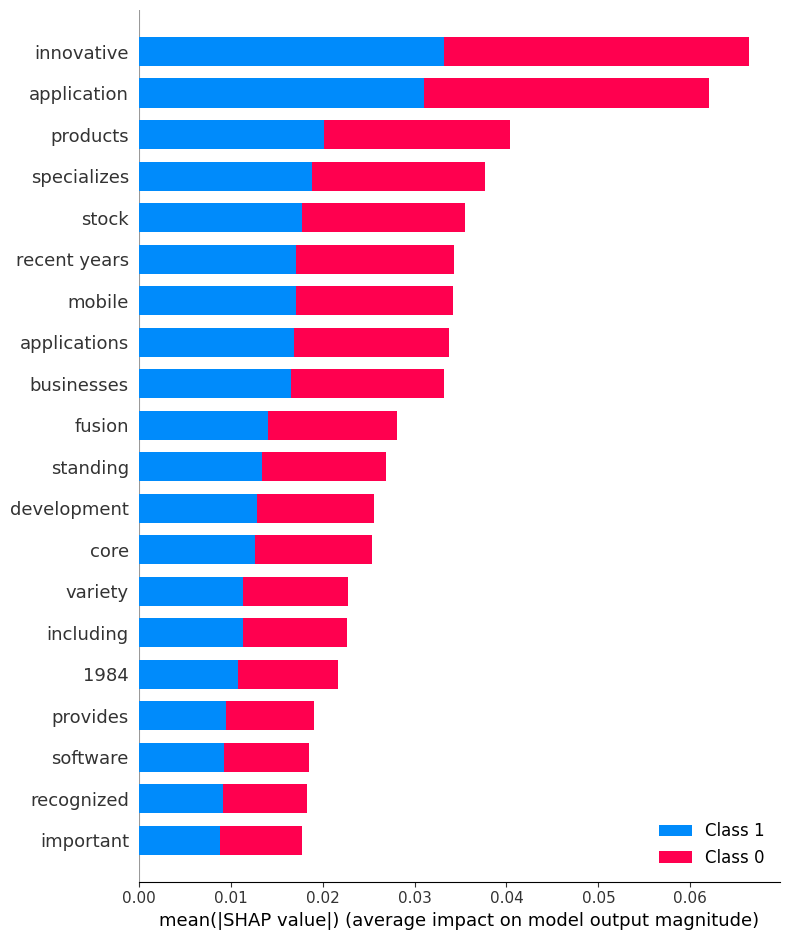

In [ ]:
#explainer = shap.Explainer(NB_classifier, X_train_tfidf)
explainer = shap.KernelExplainer(NB_classifier.predict_proba, X_train_tfidf[0:50])

# Explain predictions for a specific instance (change the index according to your dataset)
instance_idx = 0
shap_values = explainer.shap_values(X_train_tfidf[instance_idx])

# Summarize the feature importance
shap.summary_plot(shap_values, feature_names=tfidf_vectorizer.get_feature_names_out())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2)
)

# Fit and transform the training data with the TF-IDF vectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(train_sentences)

# Fit the XGBoost classifier on the training data
xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_classifier.fit(X_train_tfidf, train_labels)

# Transform the test data with the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(test_sentences)

# Make predictions using the XGBoost classifier
y_pred = xgb_classifier.predict(X_test_tfidf)


In [ ]:
explainer = shap.Explainer(xgb_classifier)
shap_values = explainer(X_train_tfidf[0:100])

[01:30:44] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


IndexError: ignored

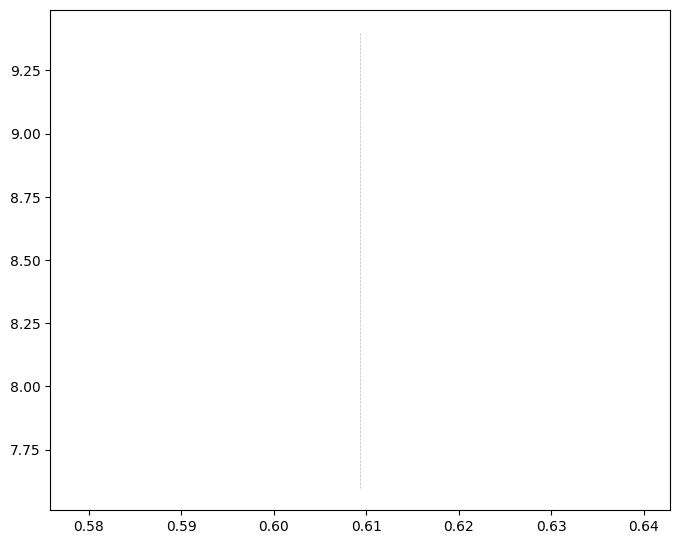

In [ ]:
shap.plots.waterfall(shap_values[0])

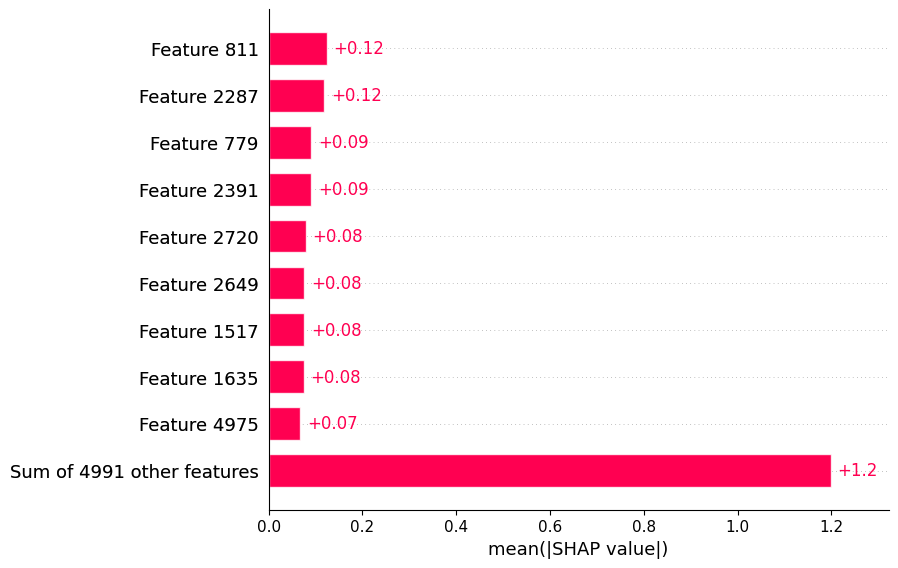

In [ ]:
shap.plots.bar(shap_values)

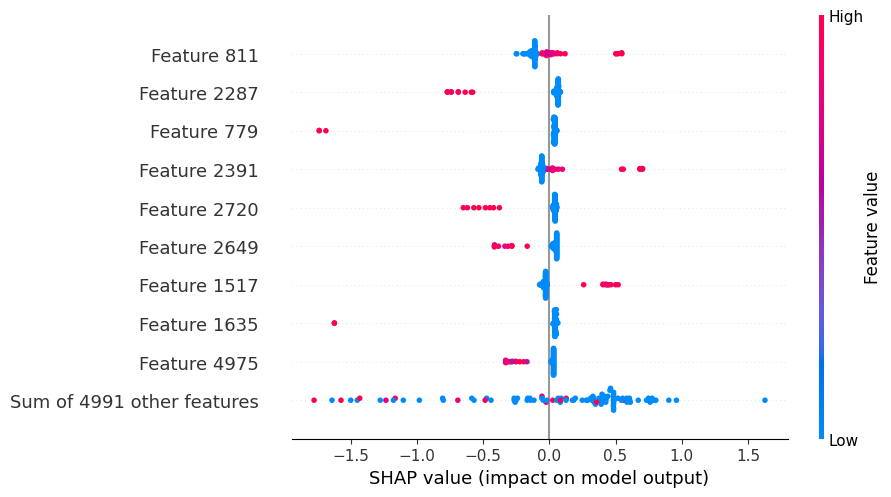

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
l = tfidf_vectorizer.get_feature_names_out()
print(l)

['00' '000' '000 copies' ... 'zero' 'zone' 'école']


In [ ]:
l[811], l[2287],l[779], l[2391], l[2720], l[2649], l[1517], l[1635], l[4975]

('born',
 'history',
 'biography',
 'including',
 'life',
 'later',
 'died',
 'early life',
 'year')

ValueError: ignored

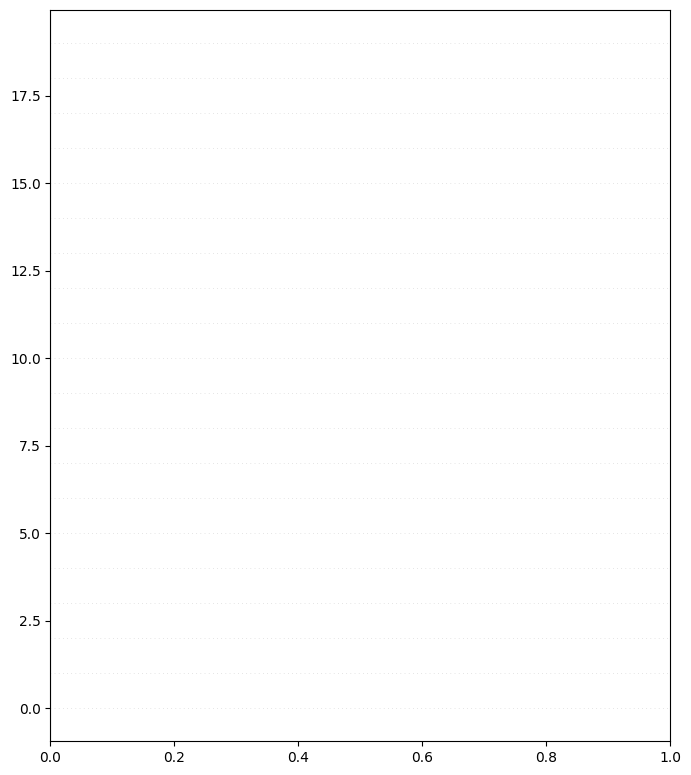

In [ ]:
shap.plots.violin(shap_values)

In [ ]:
import shap

[01:30:46] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


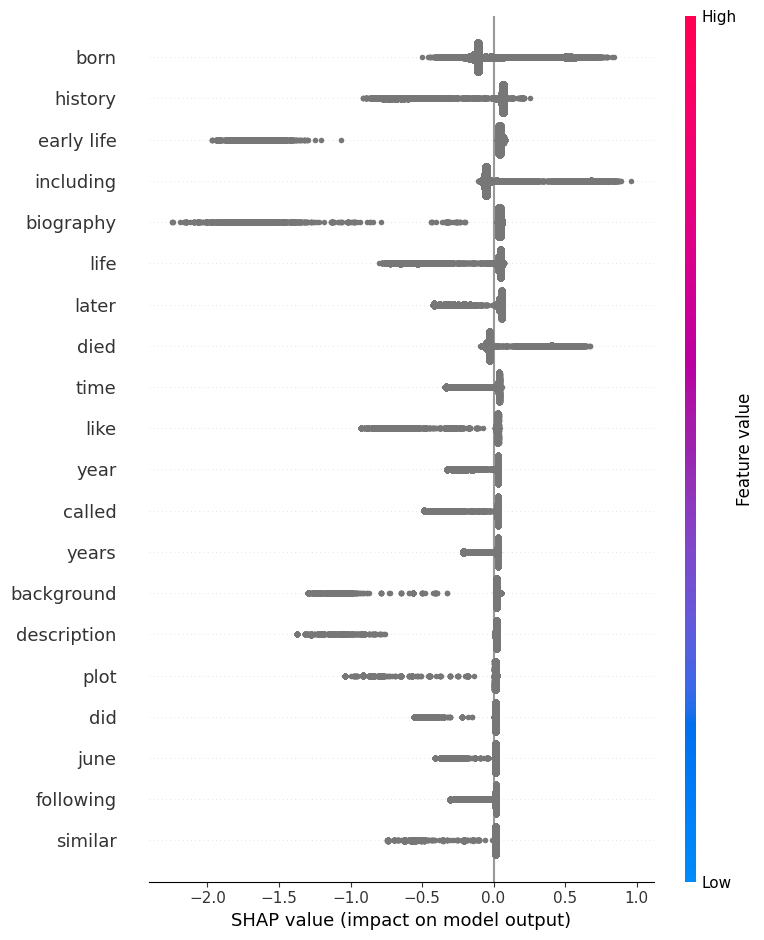

In [ ]:
explainer = shap.Explainer(xgb_classifier)

# Step 3: Compute Shapley values for the test data
shap_values = explainer.shap_values(X_train_tfidf)

# Step 4: Visualize the explanations

custom_colors = ["red", "blue"]

shap.summary_plot(shap_values, X_train_tfidf, feature_names=tfidf_vectorizer.get_feature_names_out(), color=['red'])

# Model 1: A Simple dense Model

In [ ]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = 'model_logs'

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(150, activation = 'relu')(x)
x = layers.Dense(100, activation = 'relu')(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(50, activation = 'relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model1 = tf.keras.Model(inputs, outputs, name = 'model_1_dense')

In [ ]:
model1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 163)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 163, 128)          1920000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1920129 (7.32 MB)
Trainable params: 192

In [ ]:
model1.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint_filepath2 = '/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/dataset2/LSTM'
model_checkpoint_callback2 = ModelCheckpoint(
    filepath=checkpoint_filepath2,
    save_best_only=True,
    monitor='val_accuracy',  # Choose the metric to monitor
    mode='max',  # 'max' for accuracy, 'min' for loss, etc.
    verbose=1  # 1 for progress updates, 0 for silent
)

In [ ]:
# Fit the model
model1_history = model1.fit(x = train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              y = train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20231119-211905
Epoch 1/10
3938/3938 [==============================] - 55s 13ms/step - loss: 0.1752 - accuracy: 0.9337 - val_loss: 0.1068 - val_accuracy: 0.9611
Epoch 2/10
3938/3938 [==============================] - 22s 6ms/step - loss: 0.0802 - accuracy: 0.9708 - val_loss: 0.1014 - val_accuracy: 0.9630
Epoch 3/10
3938/3938 [==============================] - 21s 5ms/step - loss: 0.0642 - accuracy: 0.9767 - val_loss: 0.1083 - val_accuracy: 0.9614
Epoch 4/10
3938/3938 [==============================] - 20s 5ms/step - loss: 0.0550 - accuracy: 0.9806 - val_loss: 0.1199 - val_accuracy: 0.9609
Epoch 5/10
3938/3938 [==============================] - 20s 5ms/step - loss: 0.0493 - accuracy: 0.9829 - val_loss: 0.1317 - val_accuracy: 0.9589
Epoch 6/10
3938/3938 [==============================] - 20s 5ms/step - loss: 0.0446 - accuracy: 0.9848 - val_loss: 0.1400 - val_accuracy: 0.9584
Epoch 7/10
3938/3938 [============================

In [ ]:
model1.evaluate(test_sentences, test_labels)

1876/1876 [==============================] - 6s 3ms/step - loss: 0.1849 - accuracy: 0.9535


[0.18492642045021057, 0.9535174369812012]

In [ ]:
model1_preds = model1.predict(test_sentences)

1876/1876 [==============================] - 5s 3ms/step


In [ ]:
model1_preds = tf.squeeze(tf.round(model1_preds))
model1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1.], dtype=float32)>

In [ ]:
model1_results = calculate_results(y_true=test_labels,
                                    y_pred = model1_preds)

model1_results

{'accuracy': 95.3517441375977,
 'precision': 0.9536458423914971,
 'recall': 0.953517441375977,
 'f1': 0.9535124527069003}

In [ ]:
pip install shap

In [ ]:
import shap

In [ ]:
# Create a SHAP explainer
explainer = shap.DeepExplainer(model1, train_sentences[0:10])

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
# Calculate SHAP values
shap_values = explainer.shap_values(train_sentences[0:10])

AttributeError: ignored

In [ ]:
# Plot summary
shap.summary_plot(shap_values, train_sentences[0:10])


# Visualize learned Embeeddings

In [ ]:
words_in_vocal = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:20]

(15000,
 ['',
  '[UNK]',
  'the',
  'of',
  'in',
  'and',
  'a',
  'to',
  'was',
  'is',
  'he',
  'as',
  'for',
  'on',
  'by',
  'with',
  'his',
  'at',
  'from',
  'it'])

In [ ]:
embed_weights = model1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)

(15000, 128)


In [ ]:
import io
# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

# Model 2 LSTM

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences = True)(x) # when you're stacking RNN cells together set return sequences = True
x = layers.LSTM(128, return_sequences = True)(x)
x = layers.LSTM(256, return_sequences = True)(x)
x = layers.LSTM(128, return_sequences = True)(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model2 = tf.keras.Model(inputs, outputs, name = 'model2_LSTM')

In [ ]:
model2.summary()

Model: "model2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 163)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 163, 128)          1920000   
                                                                 
 lstm (LSTM)                 (None, 163, 64)           49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                       

In [ ]:
model2.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
model2_history = model2.fit(train_sentences,
                            train_labels,
                            epochs = 10,
                            validation_data = (val_sentences, val_labels),
                            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                     "model2_LSTM")])

Saving TensorBoard log files to: model_logs/model2_LSTM/20231119-212802
Epoch 1/10
3938/3938 [==============================] - 103s 25ms/step - loss: 0.0862 - accuracy: 0.9698 - val_loss: 0.1869 - val_accuracy: 0.9503
Epoch 2/10
3938/3938 [==============================] - 68s 17ms/step - loss: 0.0937 - accuracy: 0.9688 - val_loss: 0.1424 - val_accuracy: 0.9554
Epoch 3/10
3938/3938 [==============================] - 69s 18ms/step - loss: 0.0752 - accuracy: 0.9738 - val_loss: 0.1458 - val_accuracy: 0.9566
Epoch 4/10
3938/3938 [==============================] - 64s 16ms/step - loss: 0.0506 - accuracy: 0.9823 - val_loss: 0.1191 - val_accuracy: 0.9600
Epoch 5/10
3938/3938 [==============================] - 64s 16ms/step - loss: 0.0431 - accuracy: 0.9852 - val_loss: 0.3410 - val_accuracy: 0.9058
Epoch 6/10
3938/3938 [==============================] - 64s 16ms/step - loss: 0.0332 - accuracy: 0.9888 - val_loss: 0.1496 - val_accuracy: 0.9625
Epoch 7/10
3938/3938 [=============================

In [ ]:
model2_pred_probs = model2.predict(test_sentences)
model2_pred_probs[:10]

1876/1876 [==============================] - 13s 7ms/step


array([[9.9995172e-01],
       [9.9990487e-01],
       [9.9932909e-01],
       [7.3211333e-05],
       [9.9995220e-01],
       [9.9925512e-01],
       [1.1158367e-03],
       [9.9992836e-01],
       [6.6047581e-04],
       [2.7630278e-03]], dtype=float32)

In [ ]:
model2_preds = tf.squeeze(tf.round(model2_pred_probs))
model2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 1., 1., 0., 1., 0., 0.], dtype=float32)>

In [ ]:
model2_results = calculate_results(y_true = test_labels,
                                   y_pred = model2_preds)
model2_results

{'accuracy': 96.2583956934051,
 'precision': 0.9626271563943252,
 'recall': 0.9625839569340511,
 'f1': 0.9625838384538113}

In [ ]:
# Create a SHAP explainer
explainer = shap.DeepExplainer(model2, train_sentences[0:10])

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
explainer = shap.GradientExplainer(model1, train_sentences[0:10])
shap_values = explainer.shap_values(train_sentences[0:10])

In [ ]:
# Calculate SHAP values
shap_values = explainer.shap_values(train_sentences[0:10])

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


AttributeError: ignored

In [ ]:
# Plot summary
shap.summary_plot(shap_values, train_sentences[0:10])

# Model 3: GRU

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences = True)(x)
x = layers.GRU(128, return_sequences = True)(x)
x = layers.LSTM(256, return_sequences = True)(x)
x = layers.LSTM(128, return_sequences = True)(x)
x = layers.GRU(64)(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model3 = tf.keras.Model(inputs, outputs, name = "model3_GRU")

In [ ]:
model3.summary()

Model: "model3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 163)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 163, 128)          1920000   
                                                                 
 gru (GRU)                   (None, 163, 64)           37248     
                                                                 
 lstm_2 (LSTM)               (None, 163, 64)           33024     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                        

In [ ]:
model3.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
model3_history = model3.fit(train_sentences,
                            train_labels,
                            epochs = 10,
                            validation_data = (val_sentences, val_labels),
                            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                     "model3_GRU")])

Saving TensorBoard log files to: model_logs/model3_GRU/20231115-045933
Epoch 1/10
3938/3938 [==============================] - 143s 35ms/step - loss: 0.0551 - accuracy: 0.9815 - val_loss: 0.2076 - val_accuracy: 0.9467
Epoch 2/10
3938/3938 [==============================] - 101s 26ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.2026 - val_accuracy: 0.9604
Epoch 3/10
3938/3938 [==============================] - 99s 25ms/step - loss: 0.0167 - accuracy: 0.9946 - val_loss: 0.1954 - val_accuracy: 0.9626
Epoch 4/10
3938/3938 [==============================] - 100s 25ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.1619 - val_accuracy: 0.9622
Epoch 5/10
3938/3938 [==============================] - 99s 25ms/step - loss: 0.0108 - accuracy: 0.9964 - val_loss: 0.1453 - val_accuracy: 0.9625
Epoch 6/10
3938/3938 [==============================] - 99s 25ms/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.1777 - val_accuracy: 0.9641
Epoch 7/10
3938/3938 [============================

In [ ]:
model3_pred_probs = model3.predict(test_sentences)
model3_pred_probs[:10]

438/438 [==============================] - 6s 12ms/step


array([[1.05331696e-04],
       [9.99989510e-01],
       [9.99895334e-01],
       [1.89566435e-07],
       [5.26237955e-07],
       [2.86633650e-07],
       [9.66734648e-01],
       [9.99974132e-01],
       [9.99989986e-01],
       [9.99984503e-01]], dtype=float32)

In [ ]:
model3_preds = tf.squeeze(tf.round(model3_pred_probs))
model3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 0., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model3_results = calculate_results(y_true = test_labels,
                                   y_pred = model3_preds)
model3_results

{'accuracy': 96.23598314406114,
 'precision': 0.962453111160484,
 'recall': 0.9623598314406114,
 'f1': 0.9623602784510867}

# Model 4 Bi Direactional RNN

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)
x = layers.Bidirectional(layers.LSTM(128, return_sequences = True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1,activation = 'sigmoid')(x)
model4 = tf.keras.Model(inputs, outputs, name = "model4_BI")

In [ ]:
model4.summary()

Model: "model4_BI"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 163)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 163, 128)          1920000   
                                                                 
 bidirectional (Bidirection  (None, 163, 128)          98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               74496     
 onal)                                                           
                                                         

In [ ]:
model4.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
model4_history = model4.fit(train_sentences,
                            train_labels,
                            epochs = 10,
                            validation_data = (val_sentences, val_labels),
                            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                     "model4_Bi-directional")])

Saving TensorBoard log files to: model_logs/model4_Bi-directional/20231115-051705
Epoch 1/10
3938/3938 [==============================] - 168s 40ms/step - loss: 0.0365 - accuracy: 0.9869 - val_loss: 0.1791 - val_accuracy: 0.9639
Epoch 2/10
3938/3938 [==============================] - 140s 36ms/step - loss: 0.0107 - accuracy: 0.9962 - val_loss: 0.1519 - val_accuracy: 0.9623
Epoch 3/10
3938/3938 [==============================] - 127s 32ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.2238 - val_accuracy: 0.9646
Epoch 4/10
3938/3938 [==============================] - 123s 31ms/step - loss: 0.0058 - accuracy: 0.9979 - val_loss: 0.1981 - val_accuracy: 0.9658
Epoch 5/10
3938/3938 [==============================] - 122s 31ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.1993 - val_accuracy: 0.9654
Epoch 6/10
3938/3938 [==============================] - 123s 31ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.1937 - val_accuracy: 0.9671
Epoch 7/10
3938/3938 [==============

In [ ]:
model4_pred_probs = model4.predict(test_sentences)
model4_pred_probs[:10]

438/438 [==============================] - 7s 13ms/step


array([[1.2056913e-04],
       [1.0000000e+00],
       [9.9999964e-01],
       [2.0743460e-09],
       [4.0642576e-07],
       [2.7147202e-09],
       [9.9998319e-01],
       [9.9999988e-01],
       [1.0000000e+00],
       [9.9999964e-01]], dtype=float32)

In [ ]:
model4_preds = tf.squeeze(tf.round(model4_pred_probs))
model4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 0., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model4_results = calculate_results(y_true = test_labels,
                                   y_pred = model4_preds)
model4_results

{'accuracy': 96.60738518677238,
 'precision': 0.9660968287959747,
 'recall': 0.9660738518677238,
 'f1': 0.9660744538145827}

## SHAP

In [ ]:
pip install shap scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.8 MB/s eta 0:00:00


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.4 MB/s eta 0:00:00


In [ ]:
import shap
import transformers

In [ ]:
from transformers import TextTransformer

ImportError: ignored

In [ ]:
transformer_model = transformers.TextTransformer(model4, text_vectorizer, embedding)

# Initialize SHAP explainer with the transformed model
explainer = shap.Explainer(transformer_model)

# Assuming `test_sentences` contains the sentences you want to explain
shap_values = explainer(test_sentences)

# Visualize the explanations (e.g., using shap.summary_plot)
shap.summary_plot(shap_values, test_sentences)

AttributeError: ignored

# Model 5 Conv1D

In [ ]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 64, kernel_size = 5, strides = 1, activation = 'relu', padding = 'valid')(x)
x = layers.Conv1D(filters = 128, kernel_size = 5, strides = 1, activation = 'relu', padding = 'valid')(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model5 = tf.keras.Model(inputs, outputs, name = "Model5_Conv1D")

model5.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

model5.summary()

Model: "Model5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 163)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 163, 128)          1920000   
                                                                 
 conv1d (Conv1D)             (None, 159, 64)           41024     
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_3 (Dropout)         (None, 64)              

In [ ]:
model5_history = model5.fit(train_sentences,
                            train_labels,
                            epochs = 5,
                            validation_data = (val_sentences, val_labels),
                            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                     "model4_Conv1D")])

Saving TensorBoard log files to: model_logs/model4_Conv1D/20231115-053942
Epoch 1/5
3938/3938 [==============================] - 78s 18ms/step - loss: 0.0540 - accuracy: 0.9797 - val_loss: 0.1354 - val_accuracy: 0.9594
Epoch 2/5
3938/3938 [==============================] - 34s 9ms/step - loss: 0.0375 - accuracy: 0.9862 - val_loss: 0.1638 - val_accuracy: 0.9599
Epoch 3/5
3938/3938 [==============================] - 33s 8ms/step - loss: 0.0302 - accuracy: 0.9889 - val_loss: 0.1552 - val_accuracy: 0.9598
Epoch 4/5
3938/3938 [==============================] - 32s 8ms/step - loss: 0.0258 - accuracy: 0.9910 - val_loss: 0.1601 - val_accuracy: 0.9599
Epoch 5/5
3938/3938 [==============================] - 33s 8ms/step - loss: 0.0220 - accuracy: 0.9922 - val_loss: 0.1747 - val_accuracy: 0.9586


In [ ]:
model5_pred_probs = model5.predict(test_sentences)
model5_pred_probs[:10]

438/438 [==============================] - 2s 4ms/step


array([[9.2047285e-03],
       [1.0000000e+00],
       [9.9999952e-01],
       [1.5595275e-09],
       [7.9150737e-04],
       [1.1894791e-11],
       [9.9468887e-01],
       [1.0000000e+00],
       [9.9999976e-01],
       [1.0000000e+00]], dtype=float32)

In [ ]:
model5_preds = tf.squeeze(tf.round(model5_pred_probs))
model5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 0., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model5_results = calculate_results(y_true = test_labels,
                                   y_pred = model5_preds)
model5_results

{'accuracy': 95.8574387543747,
 'precision': 0.9586547859551074,
 'recall': 0.9585743875437469,
 'f1': 0.9585749771433184}

# Model 6: Tensorflow Hub pretrained Sentence Encoder

In [ ]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.06462538 -0.05723969  0.02033904  0.00854338  0.03198107 -0.0549418
 -0.02973788 -0.00784131  0.04485302 -0.06055633 -0.04039752  0.02377325
  0.03573935 -0.01164928  0.03297419 -0.04821496  0.06113216 -0.04239954
  0.04982509 -0.01694498  0.06699114  0.07027017  0.01726983  0.05281518
  0.06867666  0.03043224  0.02886277  0.04559604 -0.07040983 -0.05028524
 -0.02926675  0.05089466  0.03580553  0.00964749  0.0147121  -0.02864935
 -0.069433    0.05476006  0.01465012 -0.05763232  0.02885914  0.03297279
 -0.01846485  0.00526887 -0.01674265  0.05575983  0.03301405  0.04290197
  0.06470245 -0.00251691], shape=(50,), dtype=float32)


In [ ]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [ ]:
model6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dropout(0.3),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
],name = 'model6_USE')

model6.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

model6.summary()

Model: "model6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embbeddings
model6_history = model6.fit(train_sentences,
                            train_labels,
                            epochs = 15,
                            validation_data = (val_sentences, val_labels),
                            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_endoer")])

In [ ]:
model6_pred_probs = model6.predict(test_sentences)
model6_pred_probs[:10]

438/438 [==============================] - 11s 25ms/step


array([[0.11186513],
       [0.9983656 ],
       [0.8643262 ],
       [0.12542471],
       [0.00358696],
       [0.01440922],
       [0.58634764],
       [0.9949869 ],
       [0.98518777],
       [0.9998398 ]], dtype=float32)

In [ ]:
model6_preds = tf.squeeze(tf.round(model6_pred_probs))
model6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 0., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model6_results = calculate_results(y_true = test_labels,
                                   y_pred = model6_preds)
model6_results

{'accuracy': 90.49353617598743,
 'precision': 0.904990642205827,
 'recall': 0.9049353617598743,
 'f1': 0.9049370348705552}

## BERT

In [ ]:
pip install transformers

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case = True)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
max_len = 163

X_train_encoded = tokenizer.batch_encode_plus(train_sentences.tolist(),
                                              padding = True,
                                              truncation = True,
                                              max_length = max_len,
                                              return_tensors = 'tf')

X_val_encoded = tokenizer.batch_encode_plus(val_sentences.tolist(),
                                            padding = True,
                                            truncation = True,
                                            max_length = max_len,
                                            return_tensors = 'tf')

X_test_encoded = tokenizer.batch_encode_plus(test_sentences.tolist(),
                                             padding = True,
                                             truncation = True,
                                             max_length = max_len,
                                             return_tensors = 'tf')

In [ ]:
k = 0
print('Training Comments -->>',train_sentences[k])
print('\nInput Ids -->>\n',X_train_encoded['input_ids'][k])
print('\nDecoded Ids -->>\n',tokenizer.decode(X_train_encoded['input_ids'][k]))
print('\nAttention Mask -->>\n',X_train_encoded['attention_mask'][k])
print('\nLabels -->>',train_labels[k])

Training Comments -->> deborah sale butler voice artist performance artist visual artist known work animated television series adventure time role nova marvel cinematic universe

born los angeles california butler began voice acting career 2002 providing voice bubblegum queen nicktoon series spongebob squarepants butler recurring role dr ellie sattler abc science fiction series lost 2004 2007 played title character childrens science fiction movie pleased princess 2008 voiced princess carolyn 2009 sequel displeased princess 2010 provided voice ladybug frenchproduced animated series ladybug cat noir

butler also acted independent film film 2009 primitive 2012 2014 starred nova marvel guardian galaxy vol 2 reprised role guardian galaxy vol 3 2017

Input Ids -->>
 tf.Tensor(
[  101 15555  5096  7055  2376  3063  2836  3063  5107  3063  2124  2147
  6579  2547  2186  6172  2051  2535  6846  8348 21014  5304  2141  3050
  3349  2662  7055  2211  2376  3772  2476  2526  4346  2376 11957 22850

In [ ]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint_filepath2 = '/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/dataset2/final_model2'
model_checkpoint_callback3 = ModelCheckpoint(
    filepath=checkpoint_filepath2,
    save_best_only=True,
    monitor='val_accuracy',  # Choose the metric to monitor
    mode='max',  # 'max' for accuracy, 'min' for loss, etc.
    verbose=1  # 1 for progress updates, 0 for silent
)

In [ ]:
history = model.fit(
    [X_train_encoded['input_ids'], X_train_encoded['token_type_ids'],X_train_encoded['attention_mask']],
    train_labels,
    validation_data = ([X_val_encoded['input_ids'], X_val_encoded['token_type_ids'], X_val_encoded['attention_mask']],val_labels),
    batch_size = 32,
    epochs = 1,
    callbacks=[model_checkpoint_callback3]
)

3938/3938 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9994
Epoch 1: val_accuracy did not improve from 0.99400
3938/3938 [==============================] - 1060s 269ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0606 - val_accuracy: 0.9877


In [ ]:
save_directory = '/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/ppt'
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)


('/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/ppt/tokenizer_config.json',
 '/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/ppt/special_tokens_map.json',
 '/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/ppt/vocab.txt',
 '/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/ppt/added_tokens.json')

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification

load_directory = '/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/ppt/config.json'
model = TFBertForSequenceClassification.from_pretrained(load_directory, from_pt=True)
tokenizer = BertTokenizer.from_pretrained(load_directory)

In [ ]:
input_sentence = "Since the company’s inception in 2003, Tesla’s mission has been to accelerate the world’s transition to sustainable energy. The first Tesla product, the Roadster sports car, debuted in 2008, followed by the Model S sedan, which was introduced in 2012, and the Model X SUV, which launched in 2015. Model S received Consumer Reports’ Best Overall Car and has been named the Ultimate Car of the Year by Motor Trend, while Model X was the first SUV ever to earn 5-star safety ratings in every category and sub-category in the National Highway Traffic Safety Administration’s tests. In 2017, Tesla began deliveries of Model 3, a mass-market electric vehicle with more than 320 miles of range, and unveiled Tesla Semi, which is designed to save owners at least $200,000 over a million miles based on fuel costs alone. In 2019, Tesla unveiled Cybertruck, which will have better utility than a traditional truck and more performance than a sports car, as well as the Model Y compact SUV, which began customer deliveries in early 2020."
input_sentences2 = "Elon Musk is a renowned entrepreneur and business magnate, best known for his pivotal role in advancing sustainable energy and space technology. Born on June 28, 1971, in Pretoria, South Africa, Musk exhibited an early aptitude for computers and entrepreneurship. He first gained major recognition as a co-founder of PayPal, an online payment system, which eBay acquired in 2002 for $1.5 billion. Musk's ambitions, however, extended far beyond the digital payments sphere. In 2002, he founded Space Exploration Technologies Corp. (SpaceX) with the revolutionary aim of reducing space transportation costs and enabling the colonization of Mars. SpaceX achieved significant milestones, including the development of the Falcon and Starship rockets and the Dragon spacecraft, which have been fundamental in resupplying the International Space Station and advancing public-private space exploration."


inputs = tokenizer(input_sentences2, padding=True, truncation=True, max_length=max_len, return_tensors="tf")


In [ ]:
sample = remove_puntuation(input_sentences2)
sample = sample.lower()
sample = tokenization(sample)
sample = remove_stopwords(sample)
sample = lemmatizer(sample)
sample = list_to_sent(sample)


In [ ]:
inputs = tokenizer(sample, padding=True, truncation=True, max_length=max_len, return_tensors="tf")


In [ ]:
import tensorflow as tf

predictions = model(inputs['input_ids'], token_type_ids=inputs['token_type_ids'], attention_mask=inputs['attention_mask'])
predicted_class = tf.argmax(predictions.logits, axis=1).numpy()[0]


In [ ]:
print("Predicted class:", predicted_class)


Predicted class: 1


In [ ]:
import tensorflow as tf

# Convert the TensorFlow model to a TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/d2_model.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
# Load the TFLite model using the interpreter
interpreter = tf.lite.Interpreter(model_path='/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/d2_model.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


In [ ]:
input_sentence = "Your test sentence here"
inputs = tokenizer.encode_plus(input_sentence, return_tensors="tf", max_length=512, truncation=True, padding='max_length')


In [ ]:
# Set the tensor
interpreter.set_tensor(input_details[0]['index'], inputs['input_ids'])
interpreter.set_tensor(input_details[1]['index'], inputs['attention_mask'])
# ... similarly for other required inputs like 'token_type_ids' if necessary

# Run inference
interpreter.invoke()

# Get the output
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_class = tf.argmax(output_data, axis=1).numpy()[0]


ValueError: ignored

In [ ]:
print(input_details[0]['shape'])  # Check the shape of the first input


[1 1]


In [ ]:
# For attention mask
attention_mask = inputs['attention_mask'].numpy().reshape((1, 1))  # Reshape as needed
interpreter.set_tensor(input_details[1]['index'], attention_mask)

# Repeat similarly for other inputs like 'token_type_ids' if your model uses them


ValueError: ignored

In [ ]:
import tensorflow as tf

# Convert a Keras model to a TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/d2_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
import tensorflow as tf

# Load the TFLite model using the interpreter
interpreter = tf.lite.Interpreter(model_path='/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/d2_model.tflite')
interpreter.allocate_tensors()


In [ ]:
input_sentence = "Elon Musk, born on June 28, 1971, in Pretoria, South Africa, is a visionary entrepreneur and business magnate known for his profound impact on the fields of electric vehicles, space travel, and renewable energy. Musk's entrepreneurial journey began with Zip2, a web software company, which he co-founded in 1995 and sold in 1999, leading to his first significant financial success. Musk's ambition to revolutionize transportation led him to establish SpaceX in 2002, with the audacious goal of reducing space transportation costs and enabling the colonization of Mars. SpaceX has achieved numerous milestones, including the first privately-funded spacecraft to reach orbit and the first private company to send a spacecraft to the International Space Station.In 2004, Musk joined Tesla Motors, now Tesla, Inc., as chairman and product architect, becoming CEO in 2008. Under his leadership, Tesla has become synonymous with electric vehicles, championing the adoption of sustainable energy. Tesla's innovative electric cars and energy storage products have redefined industry standards."

# Preprocess the input sentence
# This should be the same preprocessing as used during training
# Example for illustration purposes:
processed_input = input_sentence  # Replace with actual preprocessing
text_vectorizer([input_sentence])
i_s = [embedding(text_vectorizer(input_sentence))]
# Assuming `processed_input` is your tokenized data
processed_input = [np.array(i_s, dtype=np.int32)]


In [ ]:
input_details = interpreter.get_input_details()
interpreter.set_tensor(input_details[0]['index'], processed_input)


ValueError: ignored

In [ ]:
interpreter.invoke()
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])


In [ ]:
print("Prediction:", output_data)


Prediction: [[-5.4111257  5.452497 ]]


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have loaded your model, tokenizer, and have test data
# Also, assuming you have encoded test data using the tokenizer

# Tokenize and pad the test sequences
test_encoded = tokenizer.batch_encode_plus(test_sentences, padding=True, truncation=True, max_length=MAX_LENGTH, return_tensors='tf')

# Ensure the input names match the expected names in the loaded model
input_names = ['input_ids', 'attention_mask', 'token_type_ids']
inputs = {name: test_encoded[name] for name in input_names}

logits = loaded_model(inputs)['logits']
probabilities = tf.nn.softmax(logits, axis=-1)
predicted_classes = tf.argmax(probabilities, axis=-1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, print a classification report
print("\nClassification Report:")
print(classification_report(test_labels, predicted_classes))


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have true_labels and predicted_labels
# Replace these with your actual true and predicted labels


# Create a confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Customize labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


1876/1876 [==============================] - 181s 94ms/step


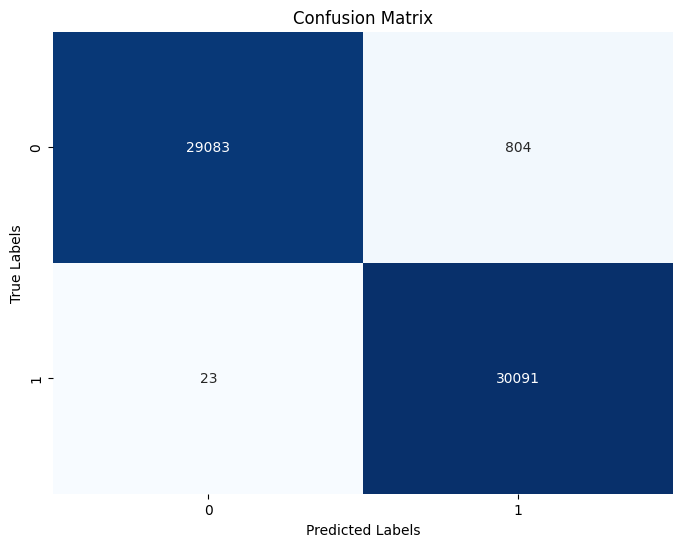

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     29887
           1       0.97      1.00      0.99     30114

    accuracy                           0.99     60001
   macro avg       0.99      0.99      0.99     60001
weighted avg       0.99      0.99      0.99     60001



In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Assume your model is named `model` and is already trained.
# Assume `X_test_encoded` is your encoded test data and `test_labels` are the true labels.

# Making predictions on the test data
predictions = model.predict([X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']])
# Convert predictions to label indices
predicted_labels = np.argmax(predictions.logits, axis=1)

# Generating the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', ax=ax, cmap='Blues', cbar=False)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

# Printing the classification report
print(classification_report(test_labels, predicted_labels))


In [ ]:
# Save the model to a specified directory
save_directory = "/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/dataset2_best_bert"

# You can save the model in TensorFlow's SavedModel format (default)
model.save(save_directory)

# Or you can save the model in the Hugging Face format (if you need compatibility)
model.save_pretrained(save_directory)


TypeError: ignored

In [ ]:
from transformers import TFBertForSequenceClassification

# Load the model from the SavedModel format
loaded_model = tf.keras.models.load_model(save_directory)

# If you saved the model in Hugging Face format, load it like this
loaded_model = TFBertForSequenceClassification.from_pretrained(save_directory)


# SHAP

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.2 MB/s eta 0:00:00


In [ ]:
import shap
import numpy as np

# Assuming you have a trained BERT model named 'model'

# Extract a specific instance from your encoded data
instance_idx = 0  # Change this index according to your dataset
X_instance = [X_train_encoded['input_ids'][instance_idx],
              X_train_encoded['attention_mask'][instance_idx]]

# Wrap the model with SHAP's `Explainer` and provide a masker
masker = shap.maskers.Text(X_instance[0], token_reference="median")
explainer = shap.Explainer(model, masker=masker)

# Generate SHAP values for the instance
shap_values = explainer(X_instance)

# Summarize the feature importance
shap.summary_plot(shap_values, feature_names=['input_ids', 'attention_mask'], plot_type='bar')


TypeError: ignored

## RoBERTa

In [ ]:
from sklearn.metrics import accuracy_score

import numpy as np

In [ ]:
pip install tokenizers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.0 MB/s eta 0:00:00


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
import tokenizers

from transformers import RobertaTokenizer, TFRobertaModel

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [ ]:
MAX_LEN = 256

In [ ]:
def roberta_encode(texts, tokenizer):
  ct = len(texts)
  input_ids = np.ones((ct, MAX_LEN), dtype = 'int32')
  attention_mask = np.zeros((ct, MAX_LEN), dtype = 'int32')
  token_type_ids = np.zeros((ct,MAX_LEN), dtype = 'int32')

  for k, text in enumerate(texts):
    tok_text = tokenizer.tokenize(text)

    enc_text = tokenizer.convert_tokens_to_ids(tok_text[:(MAX_LEN-2)])

    input_length = len(enc_text) + 2
    input_length = input_length if input_length < MAX_LEN else MAX_LEN

    # Add tokens [CLS] and [SEP] at the beginning and the end
    input_ids[k,:input_length] = np.asarray([0] + enc_text + [2], dtype='int32')

    # Set to 1s in the attention input
    attention_mask[k,:input_length] = 1

    return {
        'input_word_ids': input_ids,
        'input_mask': attention_mask,
        'input_type_ids': token_type_ids
    }

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='/content/RoBERTa/best_model1.h5',
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True)

In [ ]:
train_sentences = roberta_encode(train_sentences, tokenizer)
val_sentences = roberta_encode(val_sentences, tokenizer)

In [ ]:
train_labels = np.asarray(train_labels, dtype = 'int32')
val_labels = np.asarray(val_labels, dtype = 'int32')

In [ ]:
def build_model(num_classes = 2):
      input_word_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_word_ids')
      input_mask = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_mask')
      input_type_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_type_ids')

      # Import RoBERTa model from HuggingFace
      roberta_model = TFRobertaModel.from_pretrained('roberta-base')
      x = roberta_model(input_word_ids, attention_mask=input_mask, token_type_ids=input_type_ids)

      # Huggingface transformers have multiple outputs, embeddings are the first one,
      # so let's slice out the first position
      x = x[0]

      x = tf.keras.layers.Dropout(0.1)(x)
      x = tf.keras.layers.Flatten()(x)
      x = tf.keras.layers.Dense(256, activation='relu')(x)
      x = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

      model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=x)
      model.compile(
          optimizer=tf.keras.optimizers.Adam(lr=1e-5),
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

      return model

In [ ]:
model = build_model(num_classes = 2)
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'roberta.embeddings.position_ids', 'lm_head.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 input_mask (InputLayer)     [(None, 256)]                0         []                            
                                                                                                  
 input_type_ids (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                              

In [ ]:
history = model.fit(train_sentences,
                        train_labels,
                        epochs=15,
                        batch_size=32,
                        verbose=1,
                        callbacks = [checkpoint],
                        validation_data=(val_sentences, val_labels))

Epoch 1/15


1969/1969 [==============================] - 854s 414ms/step - loss: 0.9420 - accuracy: 0.4995 - val_loss: 0.6934 - val_accuracy: 0.4985
Epoch 2/15
1969/1969 [==============================] - 807s 410ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6933 - val_accuracy: 0.4985
Epoch 3/15
1969/1969 [==============================] - 807s 410ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 4/15
1969/1969 [==============================] - 819s 416ms/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6932 - val_accuracy: 0.5015
Epoch 5/15
1969/1969 [==============================] - 807s 410ms/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6933 - val_accuracy: 0.4985
Epoch 6/15
1969/1969 [==============================] - 807s 410ms/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 7/15
1969/1969 [==============================] - 807s 410ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.693

In [ ]:
pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 48.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text, training = False)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up",
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8435168 , -0.5132726 , -0.8884573 , ..., -0.7474886 ,
        -0.75314736,  0.91964483],
       [-0.8720836 , -0.50543964, -0.94446677, ..., -0.858475  ,
        -0.7174534 ,  0.88082975]], dtype=float32)>

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.2, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint_filepath2 = '/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/pretrained_bert2'
model_checkpoint_callback2 = ModelCheckpoint(
    filepath=checkpoint_filepath2,
    save_best_only=True,
    monitor='val_accuracy',  # Choose the metric to monitor
    mode='max',  # 'max' for accuracy, 'min' for loss, etc.
    verbose=1  # 1 for progress updates, 0 for silent
)

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
model.fit(train_sentences, train_labels, epochs=10, validation_data = (val_sentences,val_labels),
    batch_size = 32,
    callbacks=[model_checkpoint_callback2])

Epoch 1/10
3938/3938 [==============================] - ETA: 0s - loss: 0.4708 - accuracy: 0.7762 - precision: 0.7747 - recall: 0.7785
Epoch 1: val_accuracy improved from -inf to 0.81923, saving model to /content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/pretrained_bert2
3938/3938 [==============================] - 725s 184ms/step - loss: 0.4708 - accuracy: 0.7762 - precision: 0.7747 - recall: 0.7785 - val_loss: 0.4138 - val_accuracy: 0.8192 - val_precision: 0.8121 - val_recall: 0.8265
Epoch 2/10
3938/3938 [==============================] - ETA: 0s - loss: 0.4617 - accuracy: 0.7821 - precision: 0.7807 - recall: 0.7842
Epoch 2: val_accuracy did not improve from 0.81923
3938/3938 [==============================] - 708s 180ms/step - loss: 0.4617 - accuracy: 0.7821 - precision: 0.7807 - recall: 0.7842 - val_loss: 0.4096 - val_accuracy: 0.8184 - val_precision: 0.8180 - val_recall: 0.8148
Epoch 3/10
3938/3938 [==============================] - ETA: 0s - loss: 0.4613 - accura

In [ ]:
y_predicted = model.predict(test_sentences)
y_predicted = y_predicted.flatten()

1876/1876 [==============================] - 294s 156ms/step


In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
conf_matrix = confusion_matrix(test_labels, y_predicted)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, print a classification report
print("\nClassification Report:")
print(classification_report(test_labels, y_predicted))

Confusion Matrix:
[[26025  3862]
 [ 8386 21728]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81     29887
           1       0.85      0.72      0.78     30114

    accuracy                           0.80     60001
   macro avg       0.80      0.80      0.79     60001
weighted avg       0.80      0.80      0.79     60001



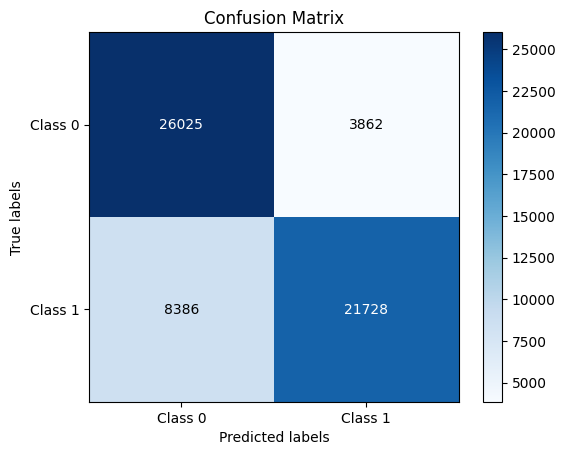

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have true_labels and predicted_labels
# Replace these with your actual true and predicted labels
true_labels = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
predicted_labels = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0]

# Create a confusion matrix
cm = confusion_matrix(test_labels, y_predicted)

# Plot the confusion matrix using matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Customize labels
classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

# Add labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
